# Youtube Subscribers

Exploratory data analysis

## Table of contents

1. [Data Loading and Cleaning](#data-loading-and-cleaning)
2. [Relationship Between Categorical Variables](#relationship-between-categorical-variables)
3. [Top 10 Youtube Channels](#top-10-youtube-channels)
4. [Subscribers by Language](#subscribers-by-language)
5. [Subscribers by Category](#subscribers-by-category)
6. [Subscribers by Country](#subscribers-by-country)

## Data Loading and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('data/youtube_subscribers_data.csv')

In [3]:
df.head()

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
0,MrBeast,No,335.0,English,Entertainment,United States
1,T-Series,Yes,280.0,Hindi,Music,India
2,Cocomelon - Nursery Rhymes,Yes,186.0,English,Education,United States
3,SET India,Yes,180.0,Hindi,Entertainment,India
4,Vlad and Niki,No,129.0,English,Entertainment,Russia


In [4]:
df.tail()

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
45,ARY Digital HD,Yes,59.7,Urdu,Entertainment,Pakistan
46,Fede Vigevani,No,59.4,Spanish,Entertainment,Mexico
47,LooLoo Kids,Yes,59.3,English,Music,Romania
48,BillionSurpriseToys,Yes,57.6,English,Entertainment,United States
49,Marshmello,No,57.5,English,Music,United States


In [5]:
df.shape

(50, 6)

In [6]:
df.sample(10)

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
36,Eminem Music,No,63.2,English,Music,United States
37,YRF,Yes,62.8,Hindi,Music,India
45,ARY Digital HD,Yes,59.7,Urdu,Entertainment,Pakistan
11,Stokes Twins,No,100.0,English,Entertainment,United States
28,Alan Chikin Chow,No,69.2,English,Entertainment,United States
38,Movieclips,Yes,62.8,English,Film,United States
42,Dude Perfect,No,60.6,English,Comedy,United States
20,Hybe Labels,Yes,76.2,Korean,Music,South Korea
49,Marshmello,No,57.5,English,Music,United States
1,T-Series,Yes,280.0,Hindi,Music,India


<Axes: >

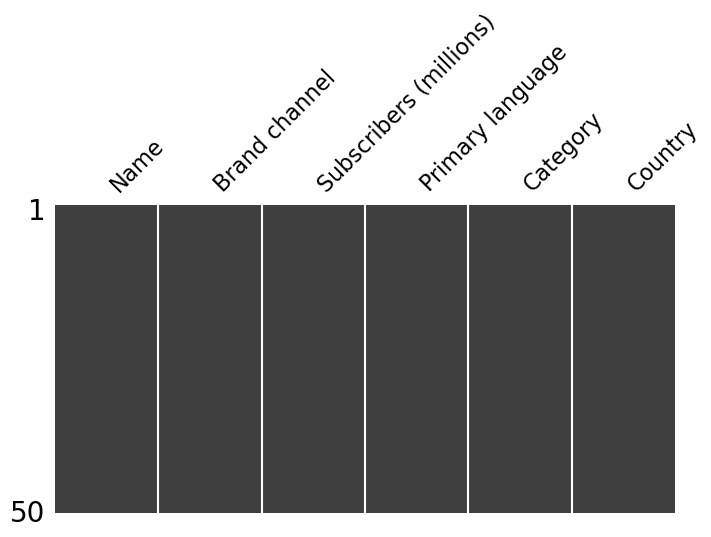

In [7]:
msno.matrix(df, figsize=(8,4), sparkline=False)

White lines indicate null values; gray lines indicate non-null values. Since there are no white lines, there are no nulls.

In [8]:
df.isnull().sum()

Name                      0
Brand channel             0
Subscribers (millions)    0
Primary language          0
Category                  0
Country                   0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    50 non-null     object 
 1   Brand channel           50 non-null     object 
 2   Subscribers (millions)  50 non-null     float64
 3   Primary language        50 non-null     object 
 4   Category                50 non-null     object 
 5   Country                 50 non-null     object 
dtypes: float64(1), object(5)
memory usage: 2.5+ KB


In [10]:
df.describe()

,Subscribers (millions)
count,50.000000
mean,90.962000
std,53.066727
min,57.500000
25%,62.900000
50%,71.200000
75%,96.950000
max,335.000000


In [11]:
df.describe(include=object)

,Name,Brand channel,Primary language,Category,Country
count,50,50,50,50,50
unique,50,2,11,11,16
top,MrBeast,Yes,English,Entertainment,India
freq,1,29,21,20,17


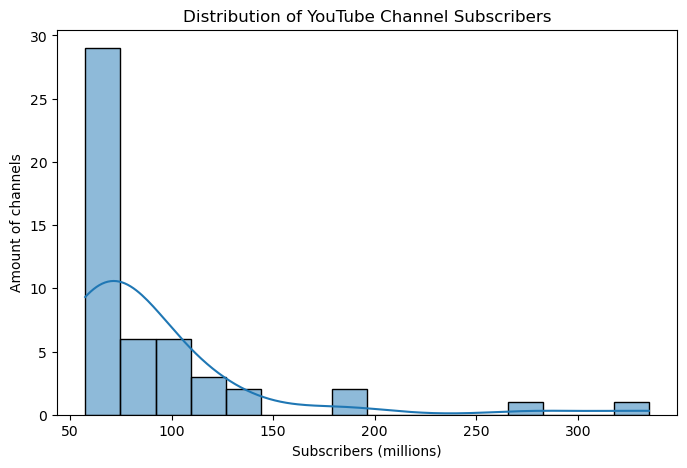

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(
    data= df['Subscribers (millions)'],
    kde= True
)

plt.title('Distribution of YouTube Channel Subscribers')
plt.xlabel('Subscribers (millions)')
plt.ylabel('Amount of channels')
plt.show()

This histogram shows the distribution of YouTube channel subscribers. The majority of channels fall within the 50 to 100 million range, with a peak closer to 50 million. Initially, the count is low, then it rises slightly before gradually declining, indicating that fewer channels have extremely high subscriber counts.

## Relationship Between Categorical Variables

In [13]:
contigency_table = pd.crosstab(df['Primary language'], df['Category'])
contigency_table

Category,Comedy,Education,Education/Entertainment,Entertainment,Entertainment/Sports,Film,How-to,Lifestyle Vlogs,Music,News,Sports
Primary language,,,,,,,,,,,
Arabic,0,0,0,1,0,0,0,0,0,0,0
Bhojpuri,0,0,0,0,0,0,0,0,1,0,0
English,1,2,1,9,0,1,1,0,5,0,1
Hindi,0,2,0,5,0,1,0,0,6,1,0
Korean,0,0,0,1,0,0,0,0,3,0,0
Malayalam,0,0,0,0,0,0,0,1,0,0,0
Portuguese,0,0,0,0,0,0,0,0,1,0,0
"Portuguese, English",0,0,0,0,1,0,0,0,0,0,0
Russian,0,0,0,1,0,0,0,0,0,0,0


### Heatmap

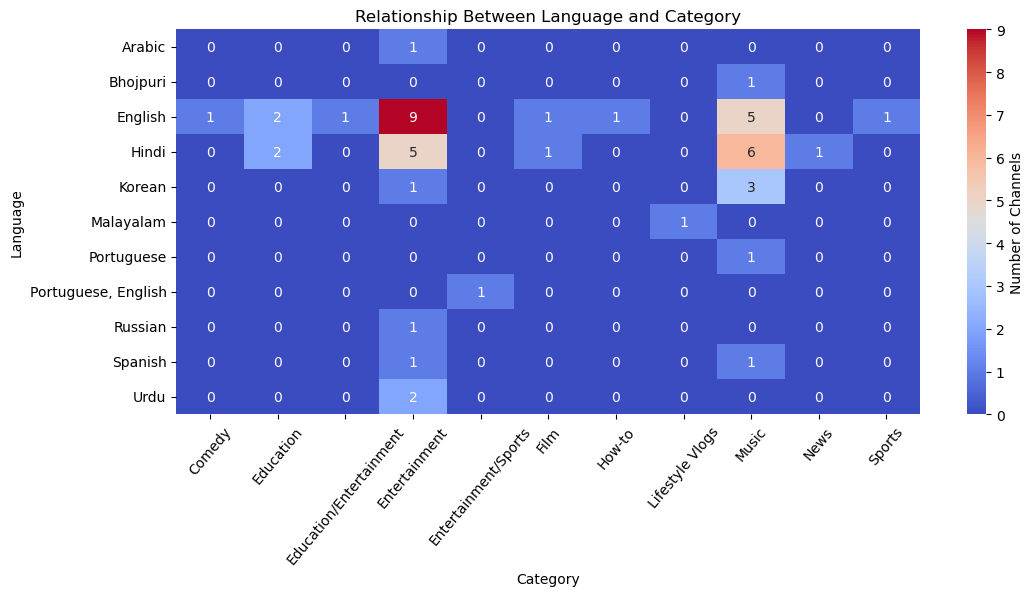

In [14]:
plt.figure(figsize=(12, 5))
sns.heatmap(
    data=contigency_table,
    annot=True,
    cmap='coolwarm',
    cbar_kws= {'label': 'Number of Channels'}
)

plt.title('Relationship Between Language and Category')
plt.xlabel('Category')
plt.ylabel('Language')
plt.xticks(rotation=50)
plt.show()

This heatmap shows the relationship between language and category. English Entertainment leads with 9 channels, followed by Hindi Music (6), Hindi Entertainment (5), and English Music (5). Other combinations have no more than 3 channels. It's interesting to see Hindi Music rank so high, as I initially expected English Music to be more dominant.

### Chi² contigency

In [15]:
chi2, P, _, _ = chi2_contingency(contigency_table)

print("Chi²:", chi2)
print("P:", P)

Chi²: 121.64390756302521
P: 0.06963134013405817


The Chi² test checks if there is a relationship between language and category. The Chi² value (121.64) shows how different the observed data is from what we would expect if there were no relationship. A higher value means a bigger difference. The p-value (0.0696) tells us the chance that this difference happened by random chance. In statistics, a common threshold is 0.05-if the p-value is below this, we usually consider the result significant. Since 0.0696 is slightly above 0.05, we don't have strong enough evidence to say there is a definite relationship, but the result is close to being significant.

In [16]:
n = contigency_table.sum().sum()
phi2 = chi2 / n
r, k = contigency_table.shape
cramer_v = np.sqrt(phi2 / min(r-1, k-1))
print("Cramér's V:", round(cramer_v, 4)) 

Cramér's V: 0.4932


Cramér's V measures the strength of the relationship between two categorical variables, ranging from 0 (no association) to 1 (strong association). The result (0.4932) suggests a moderate connection between language and category. This means there is some relationship, but it is not very strong or absolute.

## Top 10 Youtube Channels

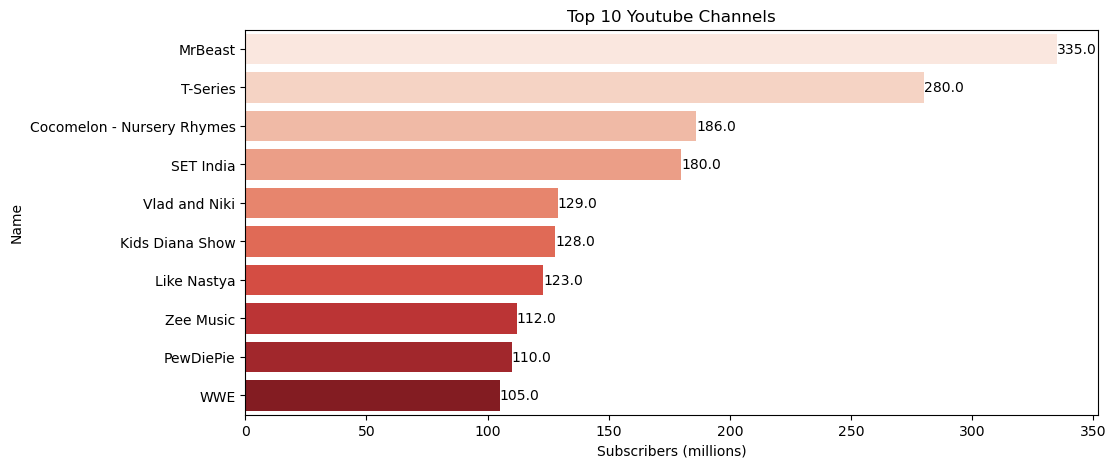

In [17]:
top_10 = df.head(10)

plt.figure(figsize=(11,5))
ax = sns.barplot(data=top_10,
            x='Subscribers (millions)',
            y='Name',
            errorbar=None,
            palette='Reds',
            hue='Name'     
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')

plt.xlabel('Subscribers (millions)')
plt.ylabel('Name')
plt.title('Top 10 Youtube Channels')
plt.show()

## Subscribers by Language

In [18]:
df.groupby('Primary language')['Subscribers (millions)'].count()


Primary language
Arabic                  1
Bhojpuri                1
English                21
Hindi                  15
Korean                  4
Malayalam               1
Portuguese              1
Portuguese, English     1
Russian                 1
Spanish                 2
Urdu                    2
Name: Subscribers (millions), dtype: int64

In [19]:
subscribers_by_language = df.groupby('Primary language')['Subscribers (millions)'].sum().reset_index().sort_values(by= 'Subscribers (millions)', ascending= False)

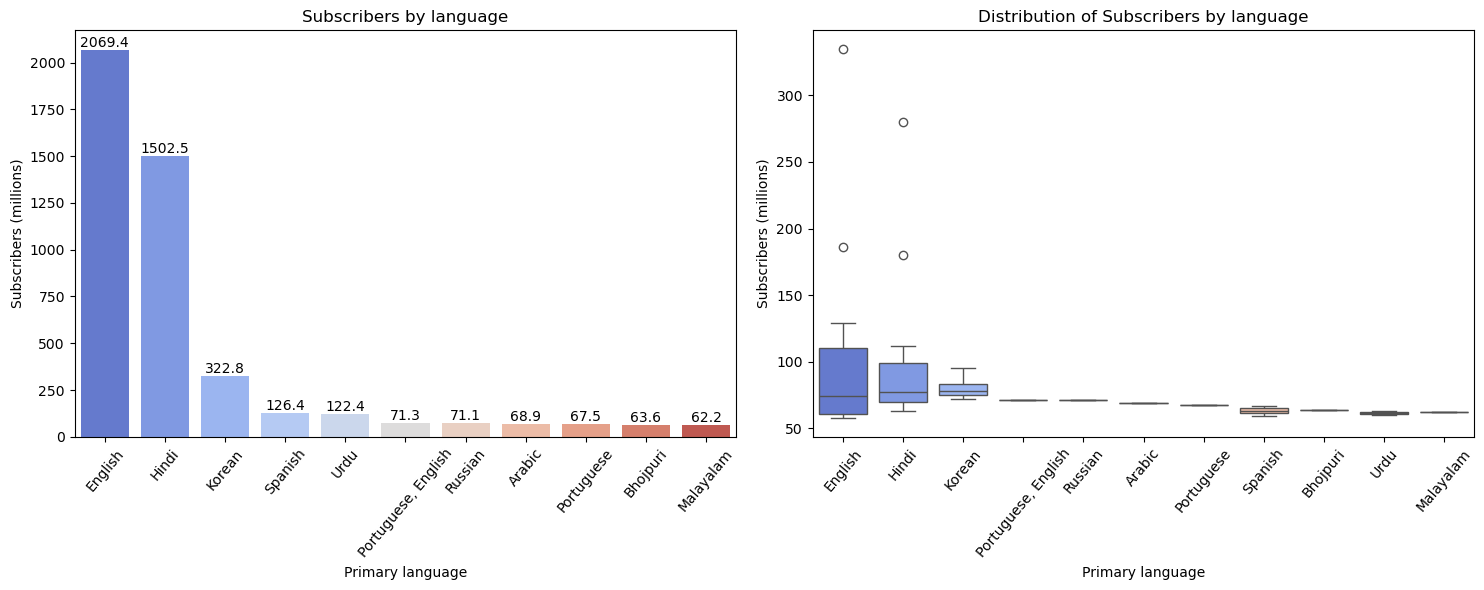

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Barplot 

ax1 = sns.barplot(
    data= subscribers_by_language,
    y= 'Subscribers (millions)',
    x= 'Primary language',
    palette= sns.color_palette('coolwarm', 11),
    hue= 'Primary language',
    ax= axes[0]
)
ax1.set(title= 'Subscribers by language')
ax1.tick_params(axis='x', rotation=50)  

for container in ax1.containers:
    ax1.bar_label(container, fmt='%.1f')

# --------------------------------------------

# Boxplot

ax2 = sns.boxplot(
    data= df,
    y= 'Subscribers (millions)',
    x= 'Primary language',
    palette= sns.color_palette('coolwarm', 11),
    hue='Primary language',
    ax= axes[1]
)
ax2.set(title= 'Distribution of Subscribers by language')
ax2.tick_params(axis='x', rotation = 50)

plt.tight_layout()
plt.show()

The boxplot on the right shows how the data is distributed and helps identify outliers.

- The 'box' represents the middle 50% of the data (from the first quartile to the third quartile).
- The line inside the box is the median, which is the middle value.
- The 'whiskers' (lines extending from the box) show the range of most of the data, excluding outliers.
- Dots outside the whiskers are outliers, meaning they are unusually high or low compared to the rest of the data.

If the box is shifted to one side or the whiskers are uneven, it means the data is not evenly spread.

## Subscribers by Category

In [21]:
df.groupby('Category')['Subscribers (millions)'].count()

Category
Comedy                      1
Education                   4
Education/Entertainment     1
Entertainment              20
Entertainment/Sports        1
Film                        2
How-to                      1
Lifestyle Vlogs             1
Music                      17
News                        1
Sports                      1
Name: Subscribers (millions), dtype: int64

In [22]:
subscribers_by_category = df.groupby('Category')['Subscribers (millions)'].count().reset_index().sort_values(by= 'Subscribers (millions)', ascending= False)

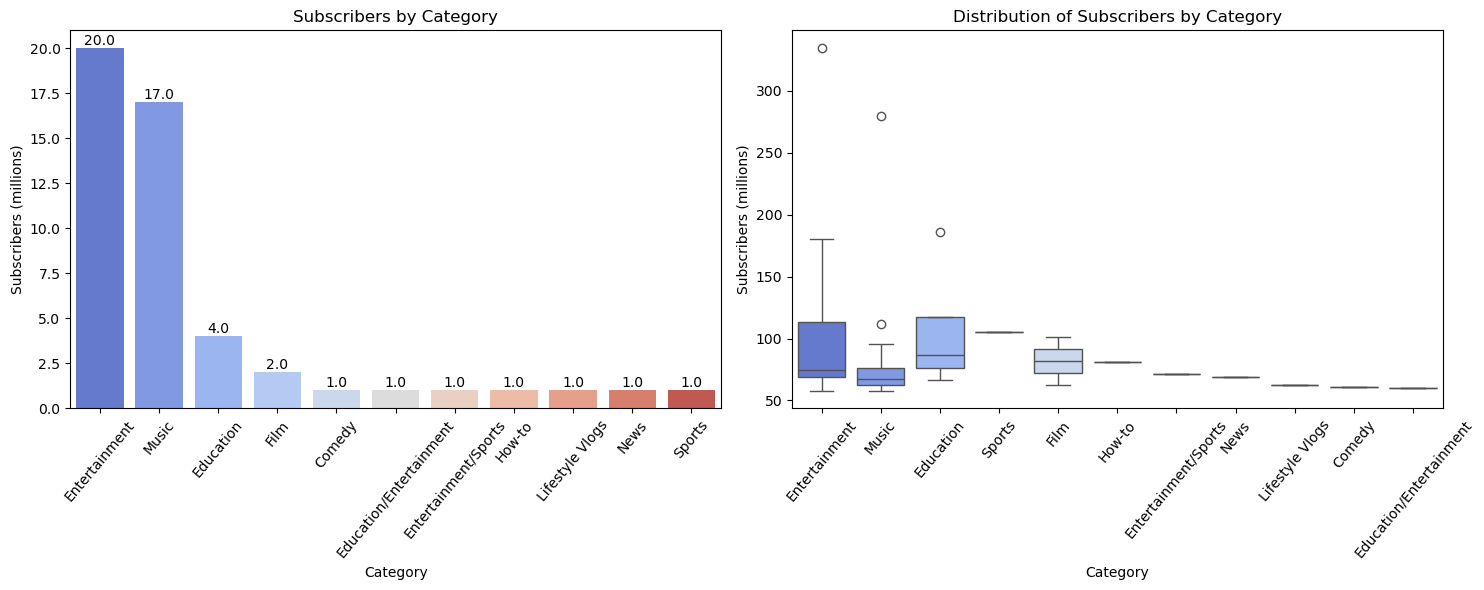

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Barplot

ax1 = sns.barplot(
    data= subscribers_by_category,
    y= 'Subscribers (millions)',
    x= 'Category',
    palette= sns.color_palette('coolwarm', 11),
    hue='Category',
    ax= axes[0]
)
ax1.set(title= 'Subscribers by Category')
ax1.tick_params(axis='x', rotation=50)  

for container in ax1.containers:
    ax1.bar_label(container, fmt='%.1f')

# ------------------------------------------

# Boxplot

ax2 = sns.boxplot(
    data= df,
    y= 'Subscribers (millions)',
    x= 'Category',
    palette= sns.color_palette('coolwarm', 11),
    hue='Category',
    ax= axes[1]
)
ax2.set(title= 'Distribution of Subscribers by Category')
ax2.tick_params(axis='x', rotation = 50)


plt.tight_layout()
plt.show()

## Subscribers by Country

In [24]:
df.groupby('Country')['Subscribers (millions)'].count()

Country
Argentina                  1
Belarus                    1
Brazil                     1
Canada                     1
Cyprus[a]                  1
India                     17
Mexico                     1
Pakistan                   2
Portugal                   1
Romania                    1
Russia                     1
South Korea                5
Sweden  Japan              1
United Arab Emirates       1
United States             13
United States  Ukraine     2
Name: Subscribers (millions), dtype: int64

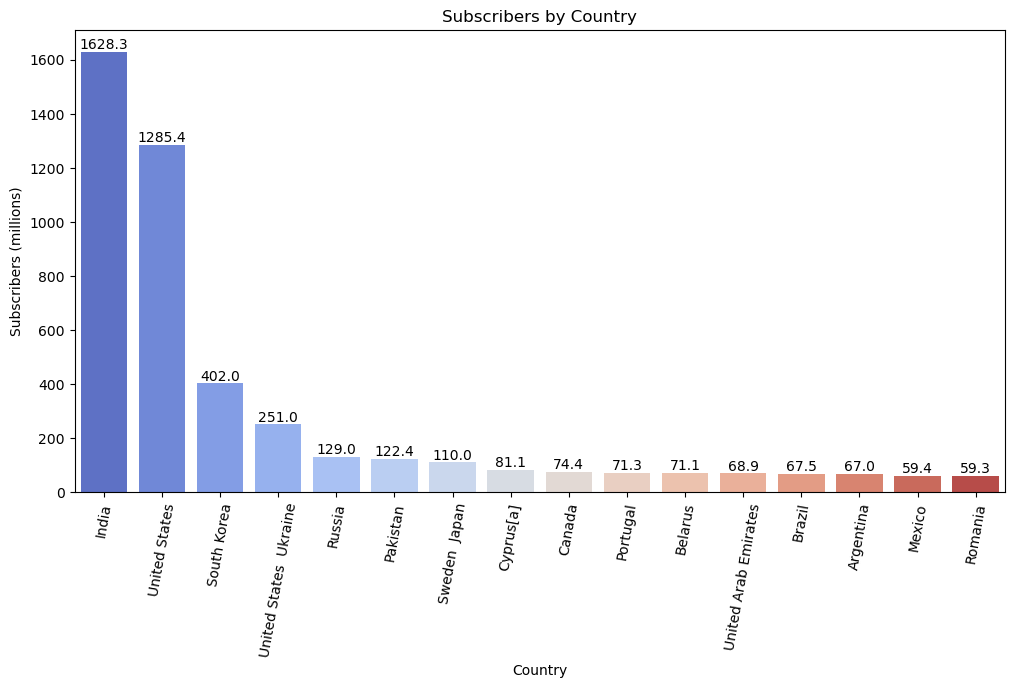

In [25]:
subscribers_by_country = df.groupby('Country')['Subscribers (millions)'].sum().reset_index().sort_values(by= 'Subscribers (millions)', ascending= False)


plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data= subscribers_by_country,
    y= 'Subscribers (millions)',
    x= 'Country',
    palette= sns.color_palette('coolwarm', 16),
    hue='Country'
)
ax.set(title= 'Subscribers by Country')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')

plt.xticks(rotation = 80)
plt.show()